## Analytics Case Solution

### Bahman Roostaei

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
data = pd.read_csv('all_users.csv')

In [3]:
data.shape

(51544, 5)

In [4]:
data_redm = pd.read_csv('Redeemers.csv')

#### Data imported from excel sheet:

#### The non-redeemer and control:

In [5]:
data.sample(frac=1).head()

,User ID,Group,Week,Spend,Purchases
15161,1032626,Test,11/10/14,$\t7.39,1
35912,117131505,Test,1/5/15,$\t24.45,4
15409,67015429,Test,11/10/14,"$\t1,039.87",6
51186,281071797,Test,2/23/15,$\t503.66,16
1697,168806092,Test,10/6/14,$\t17.67,2


#### The size of data:

In [6]:
data.shape

(51544, 5)

#### The redeemers:

In [7]:
data_redm.head()

,User ID
0,122349
1,799706
2,1032626
3,3535542
4,4369508


#### The size of redeemer data:

In [8]:
data_redm.shape

(804, 1)

### 1. Append a new column to the data in 'All Users' that identifies which buyers in the Test group were Redeemers and which were Non-Redeemers.														

In [9]:
data_redm['Redeemer'] = ['1' for _ in range(data_redm.shape[0])]

In [10]:
data_redm.head()

,User ID,Redeemer
0,122349,1
1,799706,1
2,1032626,1
3,3535542,1
4,4369508,1


In [11]:
left = data.set_index('User ID')

In [12]:
right = data_redm.set_index('User ID')

In [13]:
df = left.join(right, how='outer')

#### df index is now the User ID:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51544 entries, 122349 to 708982961
Data columns (total 5 columns):
Group        51544 non-null object
Week         51544 non-null object
Spend        51544 non-null object
Purchases    51544 non-null int64
Redeemer     11099 non-null object
dtypes: int64(1), object(4)
memory usage: 2.4+ MB


#### We already know there is no missing data in the previous dataframe so it is safe to assumethat all nan's come from merging. They are the non-redeemers.

In [19]:
df = df.fillna('0')

#### Check to see if the number of rows is not changed.

In [20]:
data.shape[0] == df.shape[0]

True

#### Looking at data again:

In [21]:
df.sample(frac=1).head(10)

,Group,Week,Spend,Purchases,Redeemer
User ID,,,,,
82458841,Test,12/15/14,$\t13.03,2,1
134635232,Test,10/13/14,$\t45.12,1,1
54827758,Control,2/9/15,$\t15.85,3,0
74937040,Control,10/6/14,$\t10.78,2,0
295543622,Control,2/16/15,$\t58.91,3,0
334534205,Test,12/15/14,$\t44.16,4,0
54675498,Control,10/13/14,$\t226.07,5,0
269465574,Control,11/17/14,$\t25.39,1,0
45881180,Test,1/12/15,$\t15.85,1,1


### 2. For each group (Control, Test-Redeemers, Test-NonRedeemers), show how spend varied over the 12 week period between 24th November 14 and 9th February 15 (from 6 weeks before the coupon 'drop date' to 6 weeks after). Graphical results are always welcome!	
															

#### Add a column that contains the datetime format:


In [22]:
df['week_date'] = df.Week.apply(lambda x:datetime.strptime(x,'%m/%d/%y'))

#### Extracting only test redeemers:


In [23]:
df_testredm = df[(df['Group']== 'Test') &
                 (df['Redeemer'] == '1')]

#### Exctracting only test non-redeemers:


In [24]:
df_testnonredm = df[(df['Group']== 'Test') &
                    (df['Redeemer'] == '0')]

#### Extracting only controls :


In [25]:
df_control = df[df['Group']== 'Control']

In [18]:
# turn off warning on version problem.
pd.options.mode.chained_assignment = None  # default='warn'

#### Extracting the desired time period for test redeemers:


In [26]:
df_testredm_splt = df_testredm[(df_testredm['week_date'] <= '02-09-2015') &
                               ('11-24-2014'<=df_testredm['week_date'])]

#### Extracting the desired time period for test non-redeemers:


In [27]:
df_testnonredm_splt = df_testnonredm[(df_testnonredm['week_date'] <= '02-09-2015') &
                                     ('11-24-2014'<=df_testnonredm['week_date'])]

#### Extracting the desired time period for controls:


In [28]:
df_control_splt = df_control[(df_control['week_date'] <= '02-09-2015') &
                             ('11-24-2014'<=df_control['week_date'])]

#### Creating a function that extracts the true numerical value of the dollar spent:


In [29]:
def spend_to_float(x):
    y = x.split('\t')[1]
    z = ''.join(y.split(','))
    return float(z)

#### Converting the Spen column to true numerical dollar for all groups:


In [30]:
df_testredm_splt['spend_float'] = df_testredm_splt.Spend.apply(spend_to_float)
df_testnonredm_splt['spend_float'] = df_testnonredm_splt.Spend.apply(spend_to_float)
df_control_splt['spend_float'] = df_control_splt.Spend.apply(spend_to_float)

#### I assume spend column shows the total spend for each row not spend per purchase.

#### Creating time series for the spend:


In [31]:
df_testredm_splt_ts = df_testredm_splt[['week_date','spend_float']]
df_testnonredm_splt_ts = df_testnonredm_splt[['week_date','spend_float']]
df_control_splt_ts = df_control_splt[['week_date','spend_float']]

#### finding out the number of unique customers in each set:


In [32]:
n_testredm = df_testredm_splt_ts.index.unique().shape[0]
n_testnonredm = df_testnonredm_splt_ts.index.unique().shape[0]
n_control = df_control_splt_ts.index.unique().shape[0]

#### Adding all the amounts spent:


In [33]:
testredm_spend = df_testredm_splt_ts.groupby('week_date').apply(np.sum)
testnonredm_spend = df_testnonredm_splt_ts.groupby('week_date').apply(np.sum)
control_spend = df_control_splt_ts.groupby('week_date').apply(np.sum)

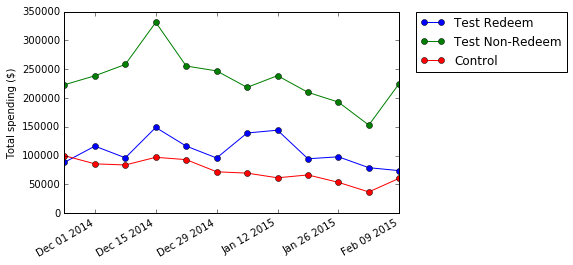

In [34]:
fig, ax = plt.subplots(1)
ax.plot(testredm_spend['spend_float'],marker='o',label='Test Redeem')
ax.plot(testnonredm_spend['spend_float'],marker='o',label='Test Non-Redeem')
ax.plot(control_spend['spend_float'],marker='o',label='Control')
plt.ylabel('Total spending ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.autofmt_xdate()

#### Adding all the amounts spent and normalizing:


In [36]:
testredm_spend_per = df_testredm_splt_ts.groupby('week_date').apply(np.sum)/ n_testnonredm
testnonredm_spend_per = df_testnonredm_splt_ts.groupby('week_date').apply(np.sum)/ n_testnonredm
control_spend_per = df_control_splt_ts.groupby('week_date').apply(np.sum)/ n_control

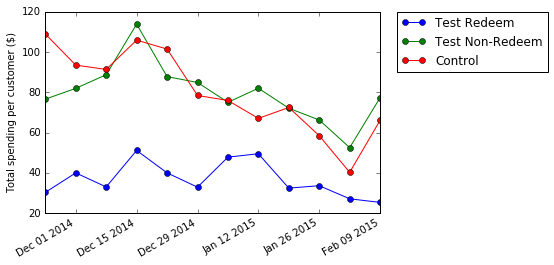

In [37]:
fig, ax = plt.subplots(1)
ax.plot(testredm_spend_per['spend_float'],marker='o',label='Test Redeem')
ax.plot(testnonredm_spend_per['spend_float'],marker='o',label='Test Non-Redeem')
ax.plot(control_spend_per['spend_float'],marker='o',label='Control')
plt.ylabel('Total spending per customer ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.autofmt_xdate()

### 3. What is the incremental spend in the six weeks after the coupons were sent (additional spend above what we would have expected had no coupon been sent out) for the total Test group (Redeemers and Non-Redeemers) vs. Control? Please express your answer in absolute ($) and % terms. You can use Excel or any other tool of your choice (e.g. R).	

#### Exctracting the test group after coupons were sent:


In [44]:
df_test_after = df[(df['Group']== 'Test') &
                   (df['week_date'] <= '02-16-2015') &
                   (df['week_date'] >= '01-05-2015')]

#### Exctracting the test group before coupons were sent:


In [45]:
df_test_before = df[(df['Group']== 'Test') &
                   (df['week_date'] <= '01-05-2015')]

#### Extracting customers who did spend:


In [46]:
df_test_before = df_test_before[df_test_before['Spend'] != ' $\t-   ']

#### Adding all the spend for test group before and after:


In [47]:
total_test_spend_after = df_test_after.Spend.apply(spend_to_float).sum()
total_test_spend_before = df_test_before.Spend.apply(spend_to_float).sum()

#### subtracting total test spend before and after coupons were sent:


In [48]:
increm_test_spend = total_test_spend_after - total_test_spend_before

#### Exctracting the control group after coupons were sent:


In [49]:
df_control_after = df[(df['Group']== 'Control') &
                      (df['week_date'] <= '02-16-2015') &
                      (df['week_date'] >= '01-05-2015')]

#### Exctracting the control group before coupons were sent:


In [50]:
df_control_before = df[(df['Group']== 'Control') &
                      (df['week_date'] <= '01-05-2015')]

#### Extracting customers who did spend:


In [51]:
df_control_before = df_control_before[df_control_before['Spend'] != ' $\t-   ']

#### Adding all the spend for control group before and after:


In [52]:
total_control_spend_after = df_control_after.Spend.apply(spend_to_float).sum()
total_control_spend_before = df_control_before.Spend.apply(spend_to_float).sum()

#### subtracting total control spend before and after coupons were sent:


In [53]:
increm_control_spend = total_control_spend_after - total_control_spend_before

In [54]:
print('Incremental spend in six weeks after coupons were sent out for test group:\n','$',
      increm_test_spend)
print('In fact we see a reduction in total spend.')

Incremental spend in six weeks after coupons were sent out for test group:
 $ -3384779.240000056
In fact we see a reduction in total spend.


In [55]:
print('Incremental spend in six weeks after coupons were sent out for control group:\n','$',
      increm_control_spend)
print('In fact we see a reduction in total spend.')

Incremental spend in six weeks after coupons were sent out for control group:
 $ -936454.5699999986
In fact we see a reduction in total spend.


In [56]:
print('Comparing the test and control incremental spend:')
print((increm_test_spend - increm_control_spend)/ increm_control_spend)

Comparing the test and control incremental spend:
2.614461767216387


The test group shows 2.6 times higher in reduction in spend. However it makes more sense to measure the above values per customer:

#### number of test customers after:


In [57]:
n_test_after = df_test_after.index.unique().shape[0]

#### number of test customers before:


In [58]:
n_test_before = df_test_before.index.unique().shape[0]

In [60]:
print('total increment per test customer:')
r_test_after = total_test_spend_after/ n_test_after
r_test_before = total_test_spend_before/ n_test_before
print('$',r_test_after - r_test_before)
print('percentage:',100*(r_test_after - r_test_before)/(r_test_before)
     ,'%')

total increment per test customer:
$ -807.7031479393006
percentage: -55.796212128011156 %


#### number of control customers after:


In [62]:
n_control_after = df_control_after.index.unique().shape[0]

#### number of control customers before:


In [63]:
n_control_before = df_control_before.index.unique().shape[0]

In [64]:
print('total increment per control customer:')
r_control_after = total_control_spend_after/ n_control_after
r_control_before = total_control_spend_before/ n_control_before
print('$',r_control_after - r_control_before)
print('percentage:',100*(r_control_after - r_control_before)/(r_control_before)
     ,'%')

total increment per control customer:
$ -931.9504326689521
percentage: -64.84797583885303 %


We see that the control customer shows more reduction in spend after coupons were sent out (64.8% vs. 55.8%).

### 4. We calculate revenue as Revenue = Spend x Take Rate. Assuming that Take Rate is 10% and that the cost of the coupon campaign is equal to the value of a coupon multiplied by the number of coupons redeemed, calculate the ROI of this campaign. 

#### Exctracting the test redeemer group after coupons were sent:


In [66]:
df_test_after = df[(df['Group']== 'Test') &
                   (df['week_date'] >= '01-05-2015')]

#### Exctracting the test non-redeemer group after coupons were sent:


In [78]:
df_control_after = df[(df['Group']== 'Control') &
                   (df['week_date'] >= '01-05-2015')]

#### Adding the spend of all test group after:


In [79]:
total_test_spent = df_test_after.Spend.apply(spend_to_float).sum()

#### Adding the spend of all control group after:


In [80]:
total_control_spent = df_control_after.Spend.apply(spend_to_float).sum()

#### total number of redeemers:


In [81]:
n_redeemers = df[(df['Group'] == 'Test') &
                (df['Redeemer'] == '1')].shape[0]

In [82]:
print('total revenue difference from control group:')
print('$',total_test_spent*0.1 - 10*n_redeemers - total_control_spent*0.1)

total revenue difference from control group:
$ 85259.11300000019


#### However it makes more sense to draw conclusions per customer (adjust to the number of customers involved in each group):

In [83]:
print('Adjusted ROI:')
print(100*((total_test_spent*0.1/ n_test_after) - 10 - (total_control_spent*0.1/ n_control_after))/(10),
     '%')

Adjusted ROI:
37.57709481839164 %
